### **Contexto**

El análisis de componentes principales (PCA) es uno de los algoritmos de aprendizaje automático no supervisado más utilizados por una gran variedad de aplicaciones: análisis de datos exploratorios, reducción de dimensionalidad, compresión de información, eliminación de ruido en datos entre otros.

Supongamos que tenemos un conjunto de datos con m atributos (o variables). Estos podrían ser, por ejemplo, precios de alimentos, cifras de ventas semanales, número de horas trabajadas, índices económicos, etc.; en definitiva cualquier  que pueda tener un impacto en otro atributo que es capturado por una etiqueta o variable de destino.
La pregunta que PCA nos ayuda a responder fundamentalmente es la siguiente: ¿Cuál de estos m atributos explican una variación significativa de los datos.?
PCA esencialmente ayuda a aplicar la regla 80/20: Puede un pequeño subconjunto de atributos (el 20%) explica el 80% o más de la variación en los datos?
El algoritmo captura los atributos que contienen la mayor cantidad de variabilidad en el conjunto de datos. Lo hace transformando las variables existentes en un conjunto de componentes principales o nuevas variables que tienen las siguientes propiedades

* No están correlacionadas entre sí.
* Juntos explican o contienen la mayor varianza de los datos.
* Se pueden vincular con los campos originales a través de factores de peso.

Los componentes principales son vectores, pero no se eligen al azar. El primer componente principal se calcula de modo que explique la mayor cantidad de varianza en los campos originales. El segundo componente es ortogonal al primero y explica la mayor cantidad de varianza que queda después del primer componente principal.

Los datos originales se pueden representar como vectores de atributos. PCA nos permite ir un paso más allá y representar los datos como combinaciones lineales de componentes principales. Obtener componentes principales equivale a una transformación lineal de datos desde los ejes atributo1 x atributo2 a ejes PCA1 x PCA2.

En conjuntos de datos muy grandes (donde el número de dimensiones puede superar las 100 variables diferentes), los componentes principales eliminan el ruido al reducir una gran cantidad de características a solo un par de componentes principales. Los componentes principales son proyecciones ortogonales de datos en un espacio de menor dimensión.

En teoría, PCA produce la misma cantidad de componentes principales que la cantidad de atributos en el conjunto de datos original. En la práctica, sin embargo, no conservamos todos los componentes principales. Cada componente principal sucesivo explica la varianza que queda después de su componente anterior, por lo que seleccionar solo algunos de los primeros componentes se aproxima suficientemente al conjunto de datos original sin la necesidad de características adicionales. 
El resultado es un nuevo conjunto de atributos formado por componentes principales.

El cálculo del PCA involucra una serie de cálculos algebraicos que se resumen en los siguientes pasos:

1.   Estandarizar los datos. (con media = 0 y varianza = 1)
2.   Calcular la matriz de covarianza de dimensiones.
3.   Obtener los vectores propios (eigenvectors)  y valores propios (eigenvalues) de la matriz de covarianza.
4.   Ordene los eigenvalues en orden descendente y elegir los k eigenvectors  
     mayores  que correspondan a los k eigenvalues más grandes (k se  
     convertirá en el número de dimensiones del subespacio de
     características   nuevas, d es el número de dimensiones originales).
5.   Construir la matriz de proyección W a partir de los k eigenvectors seleccionados.
6.   Transformar el conjunto de datos original X a través de W para obtener el nuevo subespacio Y de características k-dimensionales

Afortunadamente, herramientas como Python o Rapidminer tienen librerías u operadores que realizan todos estos pasos y por lo tanto el calculo de los componentes principales es mucho mas rápido.

Las ventajas de PCA son varias, entre ellas se encuentran:

* Visualizar información multidimensional 
* Comprimir información
* Reducir dimensiones
* Eliminar ruido en los datos
* Reducir el tiempo computacional
* Permite eliminar atributos redundantes
* Eliminar atributos correlacionados
* Graficar en dos dimensiones permite visualizar más claramente la información 
 e identificar patrones

Sin embargo, todas estas ventajas acarrean un costo asociado, y es la pérdida de información que se genera cuando se reduce la dimensionalidad. Aunque la reducción de la dimensionalidad es útil, tiene un costo. Equilibrar la reducción de la dimensionalidad y la pérdida de información es un compromiso necesario que tenemos que hacer al utilizar PCA. 
También es cierto que si bien los componentes son combinaciones lineales de las características de los datos originales, no son tan fáciles de interpretar. Por ejemplo, es difícil saber cuáles son los atributos más importantes del conjunto de datos después de calcular los componentes principales.



## **Caso de estudio**

El cáncer de mama (CM) es uno de los cánceres más comunes entre las mujeres en todo el mundo, y representa la mayoría de los casos nuevos de cáncer y muertes relacionadas según las estadísticas mundiales, lo que lo convierte en un problema de salud pública importante en la sociedad actual.

El diagnóstico temprano de CM puede mejorar significativamente el pronóstico y la probabilidad de supervivencia, ya que permite promover el tratamiento clínico oportuno de los pacientes. Una clasificación más precisa de los tumores benignos puede evitar que los pacientes se sometan a tratamientos innecesarios. Por lo tanto, el diagnóstico correcto de CM y la clasificación de los pacientes en grupos malignos o benignos es objeto de mucha investigación. 
Debido a sus ventajas únicas en la detección de características críticas a partir de conjuntos de datos de CM complejos, el aprendizaje automático  es ampliamente reconocido como la metodología de elección en la clasificación de patrones de BC y el modelado de pronóstico.
Especialmente en el campo médico, métodos como clasificación y minería de datos se utilizan ampliamente en el diagnóstico y análisis para tomar decisiones.

El objetivo de este artículo es mediante Python aplicar el concepto de Componentes Principales a un dataset complejo y obtener no solo una reducción de sus dimensiones sino una mejora en su visualizacion e interpretación.


## **Dataset**

El conjunto de datos de cáncer de mama pertenece al UCI Machine Learning Repository y es un dataset multivariante con datos reales tomados de pacientes que consta de dos clases, donde cada clase significa si una paciente tiene cáncer de mama o no. Las dos categorías son: maligno y benigno.

La clase maligna tiene 212 muestras, mientras que la clase benigna tiene 357 muestras.


#####Breast cancer wisconsin (diagnostic) dataset

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
breast_data = breast.data
breast_data.shape

(569, 30)

Cargamos el dataset en un data frame y desplegamos las primeras lineas:

In [5]:
df = pd.DataFrame(breast['data'], columns=breast['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Como podemos ver, la informacion que se muestra es dificl de interpretar. Son muchos campos y valores que parecen no tener relacion entre sí. Es clara la dificultad que tenemos para visualizar informacion de alta dimensionalidad como en este caso, de ahí que el PCA puede ser muy útil para reducir esas dimensiones y encontrar los dos principales componentes, con lo que obtendríamos un nuevo espacio bidimensional. Este nuevo espacio es mucho mas fácil de interpretar y visualizar, por ejemplo con una gráfica de tipo scatter plot.
Antes de hacer esto necesitamos estandarizar los datos para que cada atributo tenga la misma varianza.  

In [6]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df)
scaled_data = scale.transform(df) 


## **Ejecución y visualización**

Ahora viene la parte crítica, se deben transformar los datos de cáncer de mama en treinta dimensiones a componentes principales de sólo dos dimensiones.
Con una biblioteca de Scikit Learn, se importa el módulo PCA, y en su constructor se pasa el número de componentes que queremos mantenmer(n_components = 2). Finalmente se llama a fit_transform para cambiar los ejes y reducir las dimensiones.


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [8]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


Aquí vemos que el PCA redujo las dimensiones de 30 a dos, manteniendo los 569 ejemplos del dataset original.






---



In [10]:
breast = load_breast_cancer()

breast_data = breast.data
breast_data.shape
breast_labels = breast.target

breast_labels.shape
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

final_breast_data.shape
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'].replace(0, 'Benigno',inplace=True)
breast_dataset['label'].replace(1, 'Maligno',inplace=True)
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['componente principal  1', 'componente principal 2'])
print('Variacion de información por componente proincipal: {}'.format(pca_breast.explained_variance_ratio_))


Variacion de información por componente proincipal: [0.44272026 0.18971182]


A partir del resultado anterior, se puede observar que el componente principal 1 contiene el 44,2% de la información, mientras que el componente principal 2 contiene sólo el 19%. Además, el otro punto a tener en cuenta es que al proyectar datos de treinta dimensiones a datos de dos dimensiones, se perdió un 36,8% de información.
A modo de ejemplo, si generamos 5 componentes principales, vemos que el tercero retiene menos del 10%, con lo cual no tiene sentido elegir mas de dos, ya que solo difultaria la interpretación de los datos.


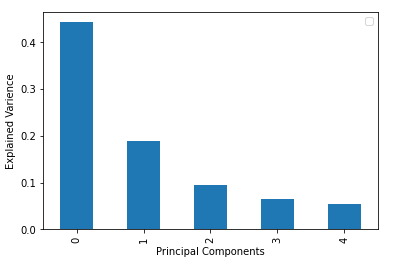

## **Interpretando los resultados**

Para poder visualizar la nueva información, podemos graficar las 569 muestras a lo largo del eje del componente principal 1 y del componente principal 2. Esto debería darnos una buena idea de cómo se distribuyen los ejemplos entre las dos clases.


<Figure size 432x288 with 0 Axes>

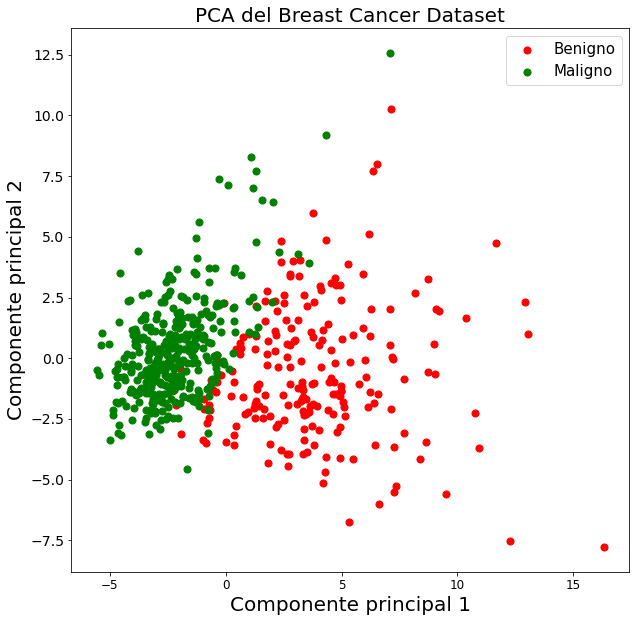

In [11]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente principal 1',fontsize=20)
plt.ylabel('Componente principal 2',fontsize=20)
plt.title("PCA del Breast Cancer Dataset",fontsize=20)
targets = ['Benigno', 'Maligno']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'componente principal  1']
               , principal_breast_Df.loc[indicesToKeep, 'componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

De la gráfica anterior, podemos ver que las dos clases benignas y malignas, cuando se proyectan en un espacio bidimensional, pueden separarse linealmente hasta cierto punto. 
Otra detalle que se puede observar es que la clase maligna está diseminada en comparación con la clase benigna que se concentra más en un área determinada. 
Luego hay una zona donde se juntan ambos grupos, en que la separacion de una u otra clase no es muy clara. Esos puntos son criticos y se deben estudiar con sumo cuidado, porque estan en una zona donde el hecho de decidir a que cluster pertenece marca una diferencia enorme sobre cual sera el tratamiento o no del paciente, y sus consecuencias. Seguramente en esos casos el medico deberá realizar exámenes adicionales, o contrastar con otra informacion.

Como se había mencionado anteriormente, la capacidad de reducir dimensiones tiene el costo asociado de que no es
fácil interpretar la informacion que representan los componentes principales.
Si quisiéramos ver qué hay dentro cada componentes, lo que encontraremos es un array en el que cada fila respresenta un componente principal y cada columna se mapea a un atributo del dataset original. El valor almacenado es el peso que tiene cada atributo de ese componente.

In [12]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [ ]:
Para poder visualizar y entender qué significan estos datos, tenemos que ir hacia atrás y llegar 
a los atributos originales. Procedemos a visualizar la informacion almacenada en el array mediante un heatmap. 

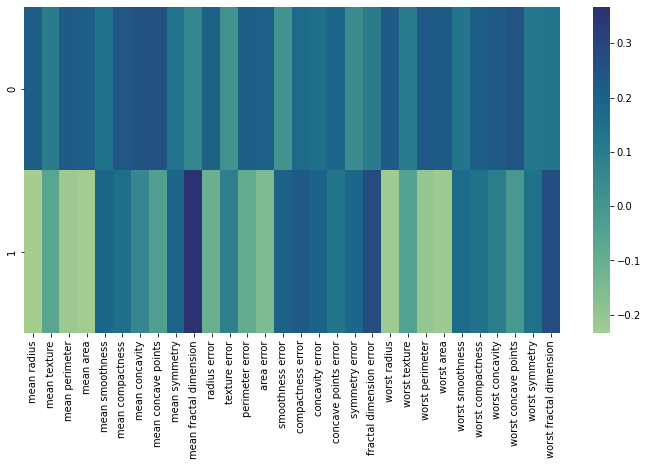

In [30]:
df_comp = pd.DataFrame(pca.components_, columns=breast['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='crest',)

In [ ]:
El heatmap y la barra de colores de la derecha básicamente representan la correlacion entre los atributos y cada componente 
principal, asi como la importancia que cada atributo tiene en el nuevo dimensionamiento. 